In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
# Creating data frames for both csv files
genotypes_df = pd.read_csv(
    'data/genotypes.csv'
)
phenotypes_df = pd.read_csv(
    'data/phenotype_df.csv',
    usecols=[4]
)
annotations_df = pd.read_csv(
    'data/annotations.csv'
)

I will now curate the genotypes dataframe to join it with 'annotations_df' by variant_id.

In [3]:
# Transposing the frame
genotypes_df = genotypes_df.T

# Extracting first row to assign new headers
headers = genotypes_df.iloc[0]

# Removing the first row with old headers
genotypes_df = genotypes_df[1:]

# Inserting our new headers
genotypes_df.columns = headers

# Sample id has become the new df index
genotypes_df.reset_index(inplace=True)  # We want it to be a column for renaming

# Internal index name removed (not necessary)
genotypes_df.index.name = None

# Renaming for later joint
genotypes_df.rename(columns={'index':'variant_id'}, inplace=True)

Checking data frames for correctness.

In [4]:
genotypes_df # Note that the index name displayed is not correct

sample_id,variant_id,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,...,sample_1990,sample_1991,sample_1992,sample_1993,sample_1994,sample_1995,sample_1996,sample_1997,sample_1998,sample_1999
0,var_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,var_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,var_3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,var_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,var_5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,var_496,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,var_497,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,var_498,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,var_499,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
phenotypes_df

,LDL
0,0.628567
1,1.201150
2,0.497542
3,-1.705572
4,0.387260
...,...
1995,0.856525
1996,-0.534039
1997,0.430098
1998,-1.935098


In [6]:
annotations_df

,variant_id,gene_name,alpha_missense
0,var_1,gene_1,0.374540
1,var_2,gene_2,0.950714
2,var_3,gene_3,0.731994
3,var_4,gene_4,0.598658
4,var_5,gene_5,0.156019
...,...,...,...
495,var_496,gene_46,0.353352
496,var_497,gene_47,0.583656
497,var_498,gene_48,0.077735
498,var_499,gene_49,0.974395


In [7]:
merged_df = pd.merge(annotations_df, genotypes_df, on='variant_id')

In [8]:
merged_df

,variant_id,gene_name,alpha_missense,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,...,sample_1990,sample_1991,sample_1992,sample_1993,sample_1994,sample_1995,sample_1996,sample_1997,sample_1998,sample_1999
0,var_1,gene_1,0.374540,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,var_2,gene_2,0.950714,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,var_3,gene_3,0.731994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,var_4,gene_4,0.598658,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,var_5,gene_5,0.156019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,var_496,gene_46,0.353352,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,var_497,gene_47,0.583656,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,var_498,gene_48,0.077735,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,var_499,gene_49,0.974395,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Grouping by genes
grouped_df = merged_df.groupby('gene_name')

# Empty frame
gene_burdens = pd.DataFrame()

for gene_name, group in grouped_df:
    # Weighted sum (I am assuming the 'alpha_missense' values are the weights)
    gene_burden = (group.iloc[:, 3:] * group['alpha_missense'].values[:, None]).sum()
    
    # Append the computed gene burden to its respective gene
    gene_burdens[gene_name] = gene_burden


In [10]:
gene_burdens

,gene_1,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,...,gene_46,gene_47,gene_48,gene_49,gene_5,gene_50,gene_6,gene_7,gene_8,gene_9
sample_0,0.0,0.0,0.438971,0.632306,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.045304,0.0,0.0,0.0,0.009197,0.0,0.0,0.0
sample_1,0.0,0.160808,0.0,1.241259,0.0,0.0,0.962173,0.0,0.0,0.0,...,0.0,0.0,0.0,0.374613,1.505466,0.0,0.0,0.0,0.0,0.0
sample_2,0.0,0.0,0.0,0.0,0.950607,0.0,1.031755,0.237249,0.803672,0.0,...,0.0,0.0,0.0,0.0,0.111197,0.0,0.0,0.0,0.0,0.0
sample_3,0.0,0.07698,0.117526,0.0,0.0,0.0,0.83598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.974395,0.0,0.0,0.0,0.0,0.0,0.905382
sample_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.62289,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_1995,0.0,0.0,0.0,0.0,0.0,0.0,0.83598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.76162,0.0
sample_1996,0.777147,0.0,0.0,0.0,0.0,0.0,0.631837,0.0,0.0,0.0,...,1.590841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample_1997,0.0,0.0,0.0,0.0,0.0,0.0,1.839546,0.374871,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101472,0.0,0.0
sample_1998,0.0,0.0,0.0,0.0,0.929698,0.224269,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.025419,0.0,0.0,0.0,0.0,0.0,0.0


This will give us a linear regression function with 50 variables plus the intercept term:

$
LDL = \beta_0 + \beta_1 \cdot gene_1 + \dots + \beta_{50} \cdot gene_{50}
$

In [11]:
# Extracting values
burdens_vals = gene_burdens.values.astype(float)

# Adding B_0 term for predictor
X = np.concatenate([np.ones((burdens_vals.shape[0], 1)), burdens_vals], axis=1)

# Target values
y = phenotypes_df.values

theta = np.linalg.inv(X.T@X) @ (X.T@y)

# Predicted values of y
yhat = X @ theta

# Extracting coefficients, we exclude B_0
coefficients = theta[1:]

# Flatten the list 
coefficients = [item for sublist in coefficients for item in sublist]

gene_names = gene_burdens.columns.tolist()

gene_names = np.array(gene_names)

In [12]:
def plot_bar(y, x, y_label, x_label, title):
    # Plot coefficients
    plt.figure(figsize=(10, 15))
    plt.barh(y, x)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

Let's now plot the gene coefficients to check for any trends.

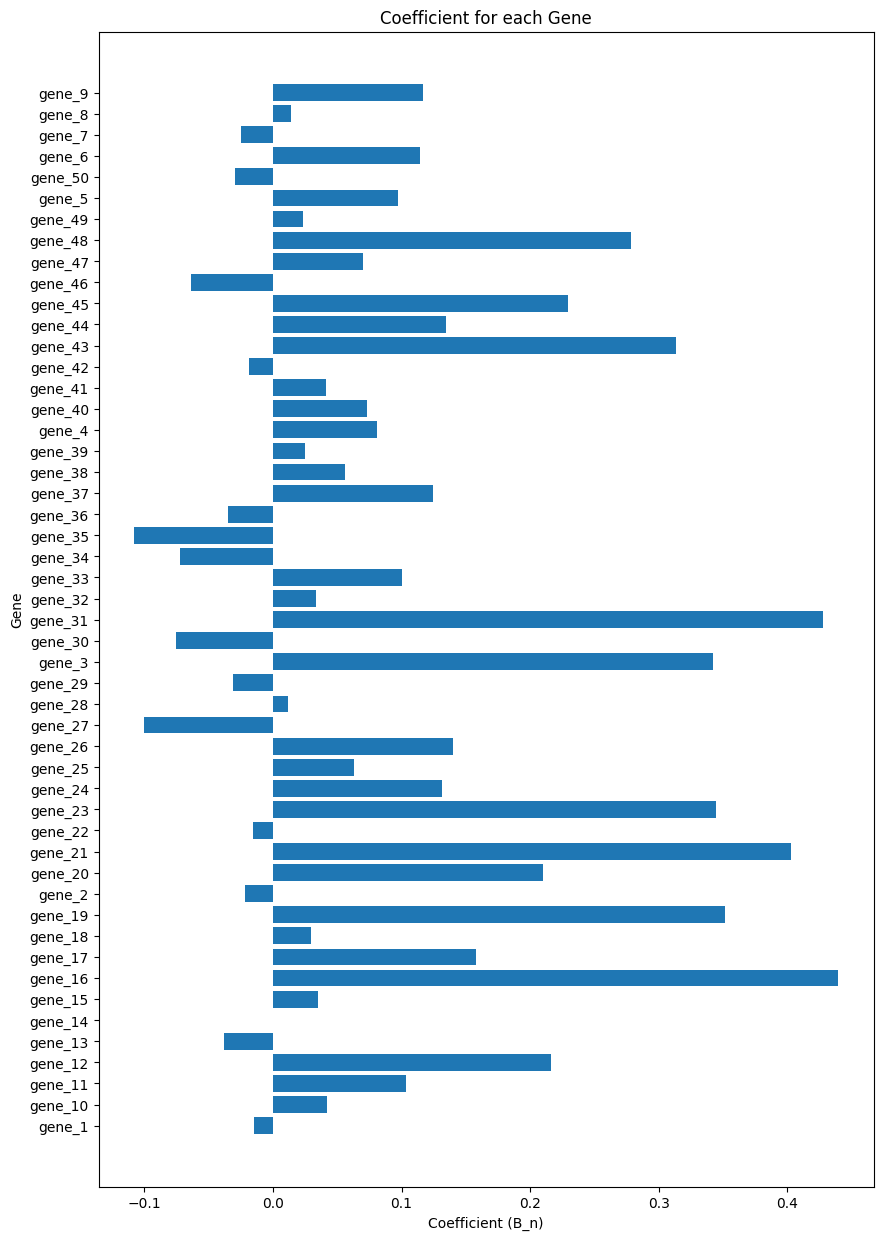

In [13]:
plot_bar(gene_names, coefficients, 'Gene', 'Coefficient (B_n)', 'Coefficient for each Gene')

At a first glance, it appears that burdens in $gene_{16}$, $gene_{31}$ and $gene_{21}$ have the highest association with an increase in LDL levels (in said order). Moreover, the majority of gene burdens lead to a positive correlation with measured LDL, with only a few showcasing a negative slope. Let's now conduct some statistical tests:

In [14]:
# t-test
res = y - yhat

# Standard error
sse = np.sum(res**2)
mse = sse / (X.shape[0] - X.shape[1])
se = np.sqrt(mse * np.diag(np.linalg.inv(X.T @ X))).reshape(-1, 1)

t_stats = theta / se

p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=X.shape[0] - X.shape[1])) for t in t_stats]

# Exclude p-value for the intercept term
p_values = p_values[1:]

p_values = [item for sublist in p_values for item in sublist]

# Extracting the indices of only those p-values lower than 0.05
significant_indices = [i for i, p in enumerate(p_values) if p < 0.05]

# Scaling them to -log_10(p)
significant_ps = [p_values[i] for i in significant_indices]
log_sig_ps = [-math.log10(p) for p in significant_ps]

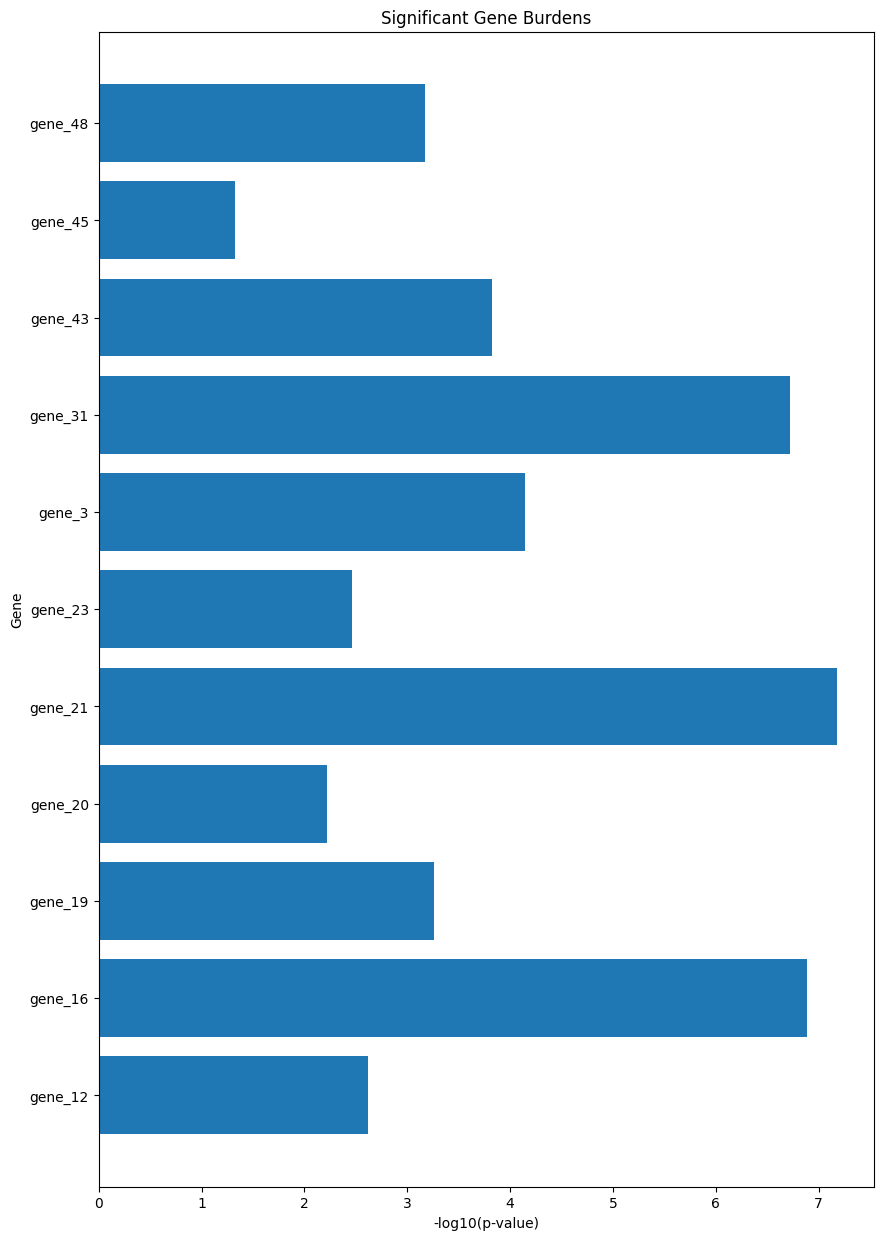

In [19]:
plot_bar([gene_names[i] for i in significant_indices], log_sig_ps, 'Gene', '-log10(p-value)', 'Significant Gene Burdens')

The p-values for these 11 gene burdens are lower than 0.05, suggesting statistical significance. Note that the 3 gene burdens previously mentioned lie within this group.

In [16]:
sorted_p_values = sorted(p_values)

lowest_3 = [i for i, p in enumerate(p_values) if p in sorted_p_values[:3]]

print([gene_names[i] for i in lowest_3])

['gene_16', 'gene_21', 'gene_31']


In fact, the lowest 3 p-values correspond to the genes discussed before. Bear in mind that I chose 3 genes as a proof-of-concept, as any of those 11 gene burdens are associated with higher LDL levels.

In [17]:
# Calculate R^2
ss_total = np.sum((y - np.mean(y))**2)
ss_err = np.sum(res**2)
r_squared = 1 - (ss_err / ss_total)

print("R^2:", r_squared)

R^2: 0.09549115416142517


However, a low $R^2$ value indicates that only a small percentage of the variance ($\approx 9.5\%$) is explained by the gene burdens in this model. This may suggest that while some of the gene burdens are statistically significant, it does not explain much of the variability in LDL levels. This leads us to believe that other factors not included in this model may also play a role on determining LDL levels.